In [1]:
import xarray as xr
import numpy as np
from filaments.plot import *
from filaments.processing import *

# Plot of filaments - California

In [2]:
path = "../../data/CAL/"
image_path = "../../immagini/CAL/"

In [3]:
chl_anomalies = xr.open_dataset(path + "MODIS_chl_anomalies_8D.nc")
temp_anomalies = xr.open_dataset(path + "CMEMS_temp_anomalies_8D.nc")
bathy = xr.open_dataset(path + "bathymetry_interpolated.nc")

bathymetry_coast = bathy.where((bathy.elevation >= -1000)).elevation.to_numpy()

lons, lats = chl_anomalies.lon, chl_anomalies.lat

c:\Users\feder\miniconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\feder\miniconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


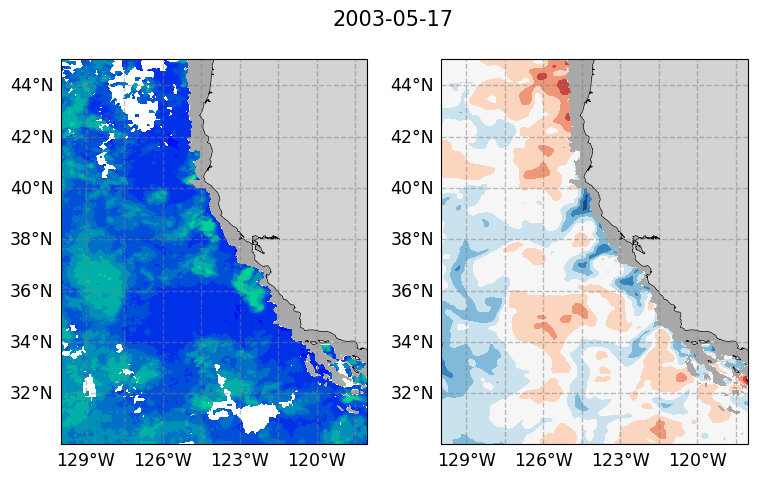

In [10]:
date = "2003-05-17"

fig, ax = set_plot(ncols = 2, figsize = [9,5])

ax = define_coast(ax, lons = lons, lats = lats, bath = bathymetry_coast)

chl = bathymetry_filter(chl_anomalies.sel(time = date).chlor_a, bathy)
temp = bathymetry_filter(temp_anomalies.sel(time = date).analysed_sst, bathy)

ax[0].contourf(lons, lats, chl, cmap = "winter")


ax[1].contourf(lons, lats, temp, cmap = "RdBu_r")

fig.suptitle(date, fontsize = 15)

plt.savefig(image_path + date + ".png", bbox_inches = "tight")

# Plot of dynamics - California